# Imported Necessary Lib

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,classification_report,confusion_matrix,roc_curve, roc_auc_score,auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xg
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
import sklearn.metrics as metrics

In [7]:
data = pd.read_csv("model.csv")

In [8]:
print("Data Head\n",data.head())

Data Head
                                               Review    Label
0  may sound noisi initi find good place bar nois...  Postive
1  good burger atmospher uniqu expect hard rock m...  Postive
2  pre arrang breakfast peopl open us normal open...  Postive
3  nice decor share platter crumb chicken spring ...  Postive
4  great hard rock never bad countri favourit far...  Postive


In [9]:
print("Data Describe\n", data.describe())

Data Describe
                                                    Review    Label
count                                                3062     3062
unique                                               1543        3
top     hard rock good hard rock staff friendli food b...  Postive
freq                                                    3     2742


In [10]:
print("Data Shape\n",data.shape)

Data Shape
 (3062, 2)


In [11]:
print("Data Label Count\n\n", data["Label"].value_counts())

Data Label Count

 Postive     2742
Negative     173
Neutral      147
Name: Label, dtype: int64


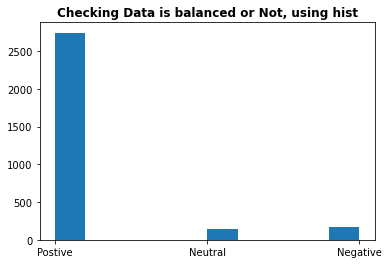

In [12]:
plt.hist(data.Label)
plt.title("Checking Data is balanced or Not, using hist",fontweight ="bold")
plt.show()

###### There is a data imbalance 

# CountVectorizer

#### The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary. You can use it as follows: Create an instance of the CountVectorizer class

In [13]:
count_vect = CountVectorizer(max_features = 3000)
x = count_vect.fit_transform(data['Review']).toarray()

In [14]:
print("count_vector shape\n\n",x.shape)

count_vector shape

 (3062, 2424)


# SMOTE - Synthetic Minority Oversampling Technique

##### way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

In [15]:
over_sample = SMOTE(random_state = 42, sampling_strategy = "all")

In [16]:
X_train_oversample, y_train_oversample = over_sample.fit_sample(x,data['Label'])

In [17]:
print("y_Train over sample \n\n", y_train_oversample.value_counts())

y_Train over sample 

 Negative    2742
Postive     2742
Neutral     2742
Name: Label, dtype: int64


In [18]:
print("x_train over sample", X_train_oversample.shape)

x_train over sample (8226, 2424)


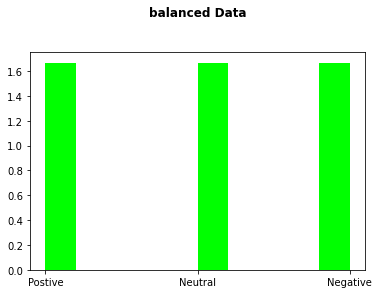

In [19]:
colors = ['lime'] 
  
plt.hist(y_train_oversample, 
         density = True,  
         histtype ='barstacked', 
         color = colors)  
  
plt.title('balanced Data\n\n', 
          fontweight ="bold") 
  
plt.show()

# Spliting The data into Train and validation

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_train_oversample, y_train_oversample, test_size = 0.3, random_state = 42)

In [21]:
print("X_train shape=",x_train.shape,'\n',"y_train shape=",y_train.shape)
print("x_test shape=",x_test.shape,'\n',"Y_test shape=" ,y_test.shape)

X_train shape= (5758, 2424) 
 y_train shape= (5758,)
x_test shape= (2468, 2424) 
 Y_test shape= (2468,)


# Ensemble 


#### Random_Forest_bagging

In [22]:
RF = RandomForestClassifier(n_estimators = 120,
                           random_state = 50,
                           n_jobs = -1,
                           max_features = 'auto')
RF.fit(X_train_oversample,y_train_oversample)

RandomForestClassifier(n_estimators=120, n_jobs=-1, random_state=50)

In [23]:
rf_pred = RF.predict(x_test)

In [24]:
print("Recall=",recall_score(y_test, rf_pred, average='micro'),'\n')
print("Accuracy of Random forest classifier=", accuracy_score(y_test,rf_pred),'\n')
print("Classification Report:\n", classification_report(y_test,rf_pred),'\n')
print("Confusion Matrix \n", confusion_matrix(y_test,rf_pred),'\n')

Recall= 0.9918962722852512 

Accuracy of Random forest classifier= 0.9918962722852512 

Classification Report:
               precision    recall  f1-score   support

    Negative       0.99      0.98      0.99       804
     Neutral       0.98      0.99      0.99       821
     Postive       1.00      1.00      1.00       843

    accuracy                           0.99      2468
   macro avg       0.99      0.99      0.99      2468
weighted avg       0.99      0.99      0.99      2468
 

Confusion Matrix 
 [[790  14   0]
 [  6 815   0]
 [  0   0 843]] 



Text(0.5, 16.5, 'Predicted Labels')

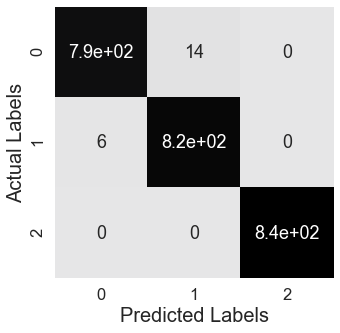

In [26]:
import seaborn as sns
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_test, rf_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(5,5))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)
#════════════════════════════════════════════

In [27]:
rf_acc = accuracy_score(y_test,rf_pred)
rf_recal = recall_score(y_test, rf_pred, average='micro')

# MultinomialNB Algorithm
#### Naive Bayes classifier for multinomial models

#### The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.


In [28]:
mn = MultinomialNB()
mn.fit(X_train_oversample, y_train_oversample)

MultinomialNB()

In [29]:
mn_pred = mn.predict(x_test)

In [30]:
print("Recall=",recall_score(y_test, mn_pred, average='micro'),'\n')
print("Accuracy of Multinomial Naive Bayes=", accuracy_score(y_test,mn_pred),'\n')
print("Classification Report:\n", classification_report(y_test,mn_pred))
print("confusion matrix:\n", confusion_matrix(y_test,mn_pred))

Recall= 0.8727714748784441 

Accuracy of Multinomial Naive Bayes= 0.8727714748784441 

Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.90      0.84       804
     Neutral       0.89      0.75      0.81       821
     Postive       0.95      0.97      0.96       843

    accuracy                           0.87      2468
   macro avg       0.88      0.87      0.87      2468
weighted avg       0.88      0.87      0.87      2468

confusion matrix:
 [[724  59  21]
 [184 615  22]
 [ 10  18 815]]


# SGDClassifier

In [31]:
sgd = SGDClassifier(alpha = 0.00047, random_state = 50)

In [32]:
sgd.fit(X_train_oversample, y_train_oversample)
sgd_pred = sgd.predict(x_test)

In [33]:
print("Recall:",recall_score(y_test,sgd_pred, average = 'micro'),'\n')
print("Accuracy of SGD=", accuracy_score(y_test,sgd_pred),'\n')
print("classification report of SGD:\n", classification_report(y_test,sgd_pred))
print("Confusion matrix sgd:\n", confusion_matrix(y_test,sgd_pred))

Recall: 0.9671799027552674 

Accuracy of SGD= 0.9671799027552674 

classification report of SGD:
               precision    recall  f1-score   support

    Negative       0.98      0.94      0.96       804
     Neutral       0.94      0.96      0.95       821
     Postive       0.99      1.00      0.99       843

    accuracy                           0.97      2468
   macro avg       0.97      0.97      0.97      2468
weighted avg       0.97      0.97      0.97      2468

Confusion matrix sgd:
 [[753  51   0]
 [ 19 791  11]
 [  0   0 843]]


# Logistic Regression

In [34]:
LR = LogisticRegression(solver = 'liblinear',
                       multi_class = 'ovr',
                       max_iter = 1000,
                       random_state = 42,
                       penalty ="l2")
LR.fit(X_train_oversample,y_train_oversample)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [35]:
LR_pred = LR.predict(x_test)

In [36]:
print("Recall:",recall_score(y_test,LR_pred, average = 'micro'),'\n')
print("Accuracy of Logistic Regression=", accuracy_score(y_test,LR_pred),'\n')
print("classification report of Logistic Regression:\n", classification_report(y_test,LR_pred))
print("Confusion matrix Logistic Regression:\n", confusion_matrix(y_test,LR_pred))

Recall: 0.9740680713128039 

Accuracy of Logistic Regression= 0.9740680713128039 

classification report of Logistic Regression:
               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96       804
     Neutral       0.95      0.98      0.96       821
     Postive       1.00      1.00      1.00       843

    accuracy                           0.97      2468
   macro avg       0.97      0.97      0.97      2468
weighted avg       0.97      0.97      0.97      2468

Confusion matrix Logistic Regression:
 [[762  42   0]
 [ 20 801   0]
 [  0   2 841]]


# XGBoost

In [37]:
xgb = xg.XGBClassifier(learning_rate = 0.01,
                       colsample_bytree = 0.8,
                       subsample = 0.8,
                       objective = 'multi:softmax', 
                       n_estimators = 100, 
                       reg_alpha = 0.3,
                       max_depth = 4, 
                       gamma = 1,
                       num_class = 3)
xgb.fit(X_train_oversample,y_train_oversample)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
xgb_pred = xgb.predict(x_test)

In [39]:
print("Recall=",recall_score(y_test,xgb_pred,average = "micro"),'\n')
print("Accuracy of XGB =", accuracy_score(y_test,xgb_pred),"\n")
print("Classification of XGB:\n",classification_report(y_test,xgb_pred),"\n")
print("Confusion matrix of XGB:\n",confusion_matrix(y_test,xgb_pred))

Recall= 0.7965964343598055 

Accuracy of XGB = 0.7965964343598055 

Classification of XGB:
               precision    recall  f1-score   support

    Negative       0.88      0.62      0.73       804
     Neutral       0.66      0.94      0.77       821
     Postive       0.95      0.83      0.89       843

    accuracy                           0.80      2468
   macro avg       0.83      0.80      0.80      2468
weighted avg       0.83      0.80      0.80      2468
 

Confusion matrix of XGB:
 [[495 304   5]
 [ 20 769  32]
 [ 45  96 702]]


# suport vector classifier

In [40]:
svm = svm.LinearSVC(multi_class = 'ovr')
svm.fit(X_train_oversample,y_train_oversample)

LinearSVC()

In [41]:
svm_pred = svm.predict(x_test)

In [42]:
print("Recall=",recall_score(y_test,svm_pred,average ='micro'),'\n')
print("Accuracy of svm=", accuracy_score(y_test,svm_pred),"\n")
print("Classification of svm:\n",classification_report(y_test,svm_pred))
print("Confusion matrix of svm:\n",confusion_matrix(y_test,svm_pred))

Recall= 0.983387358184765 

Accuracy of svm= 0.983387358184765 

Classification of svm:
               precision    recall  f1-score   support

    Negative       0.97      0.98      0.97       804
     Neutral       0.98      0.97      0.98       821
     Postive       1.00      1.00      1.00       843

    accuracy                           0.98      2468
   macro avg       0.98      0.98      0.98      2468
weighted avg       0.98      0.98      0.98      2468

Confusion matrix of svm:
 [[784  20   0]
 [ 21 800   0]
 [  0   0 843]]


# OneVsRestClassifier
##### Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and one classifier only, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy for multiclass classification and is a fair default choice.

# AdaBoostClassifier
#### It is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [43]:
ada_model = OneVsRestClassifier(AdaBoostClassifier())
ada_model.fit(X_train_oversample,y_train_oversample)

OneVsRestClassifier(estimator=AdaBoostClassifier())

In [44]:
ada_pred = ada_model.predict(x_test)

In [45]:
print("Recall =",recall_score(y_test,ada_pred,average='micro'))
print("Accuracy of ada =", accuracy_score(y_test,ada_pred),"\n")
print("Classification of ada:\n",classification_report(y_test,ada_pred),"\n")
print("Confusion matrix of ada:\n",confusion_matrix(y_test,ada_pred))

Recall = 0.88290113452188
Accuracy of ada = 0.88290113452188 

Classification of ada:
               precision    recall  f1-score   support

    Negative       0.91      0.80      0.85       804
     Neutral       0.80      0.93      0.86       821
     Postive       0.95      0.92      0.93       843

    accuracy                           0.88      2468
   macro avg       0.89      0.88      0.88      2468
weighted avg       0.89      0.88      0.88      2468
 

Confusion matrix of ada:
 [[642 149  13]
 [ 30 760  31]
 [ 30  36 777]]


# OneVsRestClassifier and XGBClassifier

In [46]:
ovr_model = OneVsRestClassifier(xg.XGBClassifier())
ovr_model.fit(X_train_oversample,y_train_oversample)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:40:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
                                      

In [47]:
ovr_model_pred = ovr_model.predict(x_test)

In [48]:
print("Recall=",recall_score(y_test,ovr_model_pred, average='micro'))
print("Accuracy of OneVsRestClassifier using xgb=", accuracy_score(y_test,ovr_model_pred),"\n")
print("Classification of  OneVsRestClassifier using xgb:\n",classification_report(y_test,ovr_model_pred),"\n")
print("Confusion matrix of  OneVsRestClassifier using xgb:\n",confusion_matrix(y_test,ovr_model_pred))

Recall= 0.9866288492706645
Accuracy of OneVsRestClassifier using xgb= 0.9866288492706645 

Classification of  OneVsRestClassifier using xgb:
               precision    recall  f1-score   support

    Negative       0.99      0.97      0.98       804
     Neutral       0.97      0.99      0.98       821
     Postive       1.00      1.00      1.00       843

    accuracy                           0.99      2468
   macro avg       0.99      0.99      0.99      2468
weighted avg       0.99      0.99      0.99      2468
 

Confusion matrix of  OneVsRestClassifier using xgb:
 [[777  27   0]
 [  5 816   0]
 [  0   1 842]]


# KNN classification

In [49]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_oversample,y_train_oversample)

KNeighborsClassifier(n_neighbors=2)

In [50]:
knn_pred = knn.predict(x_test)

In [51]:
print("Recall=",recall_score(y_test,knn_pred,average = 'micro'))
print("Accuracy of knn=", accuracy_score(y_test,knn_pred),"\n")
print("Classification of  knn:\n",classification_report(y_test,knn_pred),"\n")
print("Confusion matrix of knn:\n",confusion_matrix(y_test,knn_pred))

Recall= 0.9351701782820098
Accuracy of knn= 0.9351701782820098 

Classification of  knn:
               precision    recall  f1-score   support

    Negative       0.83      1.00      0.91       804
     Neutral       1.00      0.81      0.89       821
     Postive       1.00      1.00      1.00       843

    accuracy                           0.94      2468
   macro avg       0.94      0.94      0.93      2468
weighted avg       0.95      0.94      0.93      2468
 

Confusion matrix of knn:
 [[804   0   0]
 [158 663   0]
 [  2   0 841]]


# Linear_Model

In [52]:
per = Perceptron(penalty = 'l1',
                alpha = 0.0005)
per.fit(X_train_oversample, y_train_oversample)

Perceptron(alpha=0.0005, penalty='l1')

In [53]:
per_pred = per.predict(x_test)

In [54]:
print("Recall=",recall_score(y_test,per_pred,average='micro'))
print("Accuracy of  Perceptron=", accuracy_score(y_test,per_pred),"\n")
print("Classification of   Perceptron:\n",classification_report(y_test,per_pred),"\n")
print("Confusion matrix of  Perceptron:\n",confusion_matrix(y_test,per_pred))

Recall= 0.8845218800648298
Accuracy of  Perceptron= 0.8845218800648298 

Classification of   Perceptron:
               precision    recall  f1-score   support

    Negative       0.96      0.76      0.85       804
     Neutral       0.78      0.96      0.86       821
     Postive       0.95      0.93      0.94       843

    accuracy                           0.88      2468
   macro avg       0.90      0.88      0.88      2468
weighted avg       0.90      0.88      0.88      2468
 

Confusion matrix of  Perceptron:
 [[611 174  19]
 [  6 791  24]
 [ 18  44 781]]


In [55]:
pac = PassiveAggressiveClassifier(class_weight = 'balanced',
                                 C = 0.4)
pac.fit(X_train_oversample, y_train_oversample)
pac_pred = pac.predict(x_test)

In [56]:
print("Recall=", recall_score(y_test,pac_pred,average='micro'))
print("Accuracy of  PassiveAggressiveClassifier=", accuracy_score(y_test,pac_pred),"\n")
print("Classification of   PassiveAggressiveClassifier\n\n",classification_report(y_test,pac_pred),"\n")
print("Confusion matrix of  PassiveAggressiveClassifier\n\n\n",confusion_matrix(y_test,pac_pred))

Recall= 0.9781199351701783
Accuracy of  PassiveAggressiveClassifier= 0.9781199351701783 

Classification of   PassiveAggressiveClassifier

               precision    recall  f1-score   support

    Negative       0.97      0.96      0.97       804
     Neutral       0.96      0.97      0.97       821
     Postive       1.00      1.00      1.00       843

    accuracy                           0.98      2468
   macro avg       0.98      0.98      0.98      2468
weighted avg       0.98      0.98      0.98      2468
 

Confusion matrix of  PassiveAggressiveClassifier


 [[772  32   0]
 [ 22 799   0]
 [  0   0 843]]


In [57]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_oversample, y_train_oversample)

LinearDiscriminantAnalysis()

In [58]:
lda_pred = lda.predict(x_test)

In [59]:
print("Recall=",recall_score(y_test,lda_pred,average='micro'))
print("Accuracy of  LinearDiscriminantAnalysi=", accuracy_score(y_test,lda_pred),"\n")
print("Classification of   LinearDiscriminantAnalysi\n\n",classification_report(y_test,lda_pred),"\n")
print("Confusion matrix of  LinearDiscriminantAnalysi\n\n\n",confusion_matrix(y_test,lda_pred))

Recall= 0.9712317666126418
Accuracy of  LinearDiscriminantAnalysi= 0.9712317666126418 

Classification of   LinearDiscriminantAnalysi

               precision    recall  f1-score   support

    Negative       0.98      0.93      0.96       804
     Neutral       0.93      0.98      0.96       821
     Postive       1.00      1.00      1.00       843

    accuracy                           0.97      2468
   macro avg       0.97      0.97      0.97      2468
weighted avg       0.97      0.97      0.97      2468
 

Confusion matrix of  LinearDiscriminantAnalysi


 [[747  57   0]
 [ 13 808   0]
 [  0   1 842]]


# RIDGE 

In [60]:
rc = RidgeClassifier()
rc.fit(X_train_oversample, y_train_oversample)

RidgeClassifier()

In [61]:
rc_pred = rc.predict(x_test)

In [62]:
print("Recall=",recall_score(y_test,rc_pred,average='micro'),'\n')
print("Accuracy of ridge=", accuracy_score(y_test,rc_pred),"\n")
print("Classification of ridge:\n",classification_report(y_test,rc_pred),"\n")
print("Confusion matrix of ridge:\n",confusion_matrix(y_test,rc_pred))

Recall= 0.9517828200972447 

Accuracy of ridge= 0.9517828200972447 

Classification of ridge:
               precision    recall  f1-score   support

    Negative       0.97      0.88      0.92       804
     Neutral       0.89      0.97      0.93       821
     Postive       1.00      1.00      1.00       843

    accuracy                           0.95      2468
   macro avg       0.95      0.95      0.95      2468
weighted avg       0.95      0.95      0.95      2468
 

Confusion matrix of ridge:
 [[707  97   0]
 [ 21 800   0]
 [  1   0 842]]


# All Model Accuracy

In [63]:
print("All Model Accuracy")

print("---------------------------------------------")
print("Accuracy of Random forest classifier=", accuracy_score(y_test,rf_pred),'\n')
print("---------------------------------------------")
print("Accuracy of Multinomial Naive Bayes=", accuracy_score(y_test,mn_pred),'\n')
print("---------------------------------------------")
print("Accuracy of SGD=", accuracy_score(y_test,sgd_pred),'\n')
print("---------------------------------------------")
print("Accuracy of Logistic Regression=", accuracy_score(y_test,LR_pred),'\n')
print("---------------------------------------------")
print("Accuracy of svm=", accuracy_score(y_test,svm_pred),"\n")
print("---------------------------------------------")
print("Accuracy of ada =", accuracy_score(y_test,ada_pred),"\n")
print("---------------------------------------------")
print("Accuracy of XGB =", accuracy_score(y_test,xgb_pred),"\n")
print("---------------------------------------------")
#print("Accuracy of OneVsRestClassifier using xgb=", accuracy_score(y_test,ovr_model_pred),"\n")
print("Accuracy of knn=", accuracy_score(y_test,knn_pred),"\n")
print("---------------------------------------------")
print("Accuracy of Perceptron=", accuracy_score(y_test,per_pred),"\n")
print("---------------------------------------------")
print("Accuracy of PassiveAggressiveClassifier=", accuracy_score(y_test,pac_pred),"\n")
print("---------------------------------------------")
print("Accuracy of LinearDiscriminantAnalysi=", accuracy_score(y_test,lda_pred),"\n")
print("---------------------------------------------")
print("Accuracy of ridge=", accuracy_score(y_test,rc_pred),"\n")

All Model Accuracy
---------------------------------------------
Accuracy of Random forest classifier= 0.9918962722852512 

---------------------------------------------
Accuracy of Multinomial Naive Bayes= 0.8727714748784441 

---------------------------------------------
Accuracy of SGD= 0.9671799027552674 

---------------------------------------------
Accuracy of Logistic Regression= 0.9740680713128039 

---------------------------------------------
Accuracy of svm= 0.983387358184765 

---------------------------------------------
Accuracy of ada = 0.88290113452188 

---------------------------------------------
Accuracy of XGB = 0.7965964343598055 

---------------------------------------------
Accuracy of knn= 0.9351701782820098 

---------------------------------------------
Accuracy of Perceptron= 0.8845218800648298 

---------------------------------------------
Accuracy of PassiveAggressiveClassifier= 0.9781199351701783 

---------------------------------------------
Accuracy

# We selected RandomForest